In [1]:
# 텐서플로 2 버전 선택
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf

# 6.2 주요 레이어 정리

16384/15922 [==============================] - 0s 9us/step


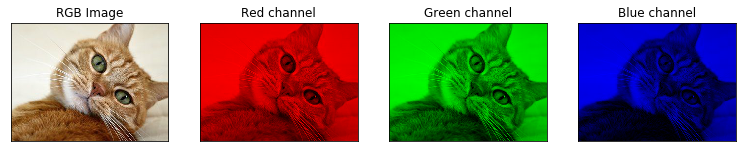

In [2]:
# 그림 6.8 출력 코드. 참고 링크 : https://stackoverflow.com/a/37435090/2689257
import matplotlib.pyplot as plt

image_path = tf.keras.utils.get_file('cat.jpg', 'http://bit.ly/33U6mH9')
image = plt.imread(image_path)

titles = ['RGB Image', 'Red channel', 'Green channel', 'Blue channel']
cmaps = [None, plt.cm.Reds_r, plt.cm.Greens_r, plt.cm.Blues_r]

from numpy import array, zeros_like
def channel(image, color):
    if color not in (0, 1, 2): return image
    c = image[..., color]
    z = zeros_like(c)
    return array([(c, z, z), (z, c, z), (z, z, c)][color]).transpose(1,2,0)
  
colors = range(-1, 3)
fig, axes = plt.subplots(1, 4, figsize=(13,3))
objs = zip(axes, titles, colors)
for ax, title, color in objs:
    ax.imshow(channel(image, color))
    ax.set_title(title)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

In [3]:
# 6.1 Conv2D 레이어 생성 코드
conv1 = tf.keras.layers.Conv2D(kernel_size=(3,3),strides=(2,2),padding='valid' ,filters=16)

In [4]:
# 6.2 MaxPool2D 레이어 생성 코드
pool1 = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2))

In [5]:
# 6.3 Dropout 레이어 생성 코드
pool1 = tf.keras.layers.Dropout(rate=0.3)

# 6.3 Fashion MNIST with CNN

In [6]:
# 6.4 Fashion MNIST 데이터셋 불러오기 및 정규화
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

train_X = train_X / 255.0
test_X = test_X / 255.0

참고 : reshape에서 -1의 사용법 --> 고정된 상태에서 남은 것을 유동적으로
<img src="img/img_19.png">

In [7]:
# 6.5 데이터를 채널을 가진 이미지 형태(3차원)으로 바꾸기
# reshape 이전
print(train_X.shape, test_X.shape)

train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

# reshape 이후
print(train_X.shape, test_X.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


<img src="img/img_21.png">

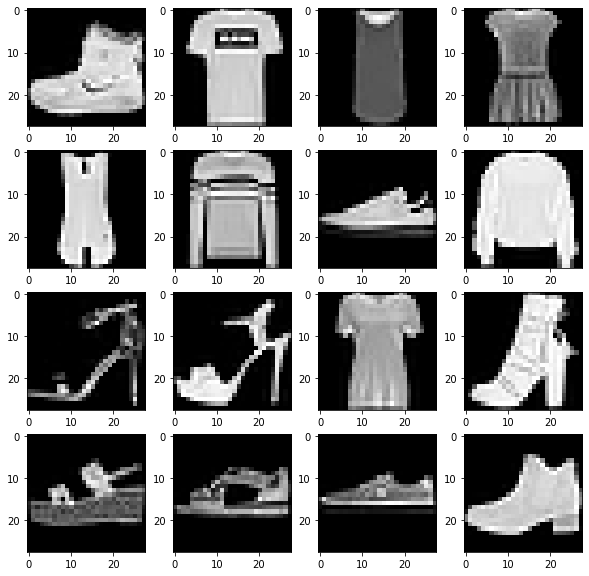

[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9]


In [8]:
# 6.6 데이터 확인
import matplotlib.pyplot as plt
# 전체 그래프의 사이즈를 width=10, height=10 으로 지정합니다.
plt.figure(figsize=(10, 10))
for c in range(16):
    # 4행 4열로 지정한 grid 에서 c+1 번째의 칸에 그래프를 그립니다. 1~16 번째 칸을 채우게 됩니다.
    plt.subplot(4,4,c+1)
    plt.imshow(train_X[c].reshape(28,28), cmap='gray')
    
plt.show()

# train 데이터의 첫번째 ~ 16번째 까지의 라벨을 프린트합니다.
print(train_Y[:16])

In [9]:
# 6.7 Fashion MNIST 분류 컨볼루션 신경망 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=16),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=32),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 30976)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3965056   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 3,989,642
Trainable params: 3,989,642
Non-trainable params: 0
______________________________________________

Train on 45000 samples, validate on 15000 samples
Epoch 1/3
45000/45000 [==============================] - 183s 4ms/sample - loss: 0.1849 - accuracy: 0.9319 - val_loss: 0.4751 - val_accuracy: 0.8715
Epoch 2/3
45000/45000 [==============================] - 191s 4ms/sample - loss: 0.1626 - accuracy: 0.9404 - val_loss: 0.5120 - val_accuracy: 0.8627
Epoch 3/3
45000/45000 [==============================] - 197s 4ms/sample - loss: 0.1458 - accuracy: 0.9457 - val_loss: 0.5609 - val_accuracy: 0.8687


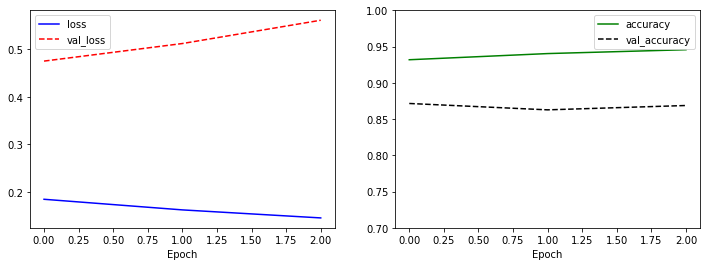

[0.568538497364521, 0.865]

In [12]:
# 6.9 Fashion MNIST 분류 컨볼루션 신경망 모델 학습
#history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)
# 위에 너무 오래걸려서리;;;;;GPU없이는..
history = model.fit(train_X, train_Y, epochs=3, validation_split=0.25)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)

Overfitting이 이루어진 것을 볼 수 있음--> val은 성능이 나빠짐;;;;;;train만 좋아지고 있음..
<img src="img/img_22.png">

In [13]:
# 6.10 Fashion MNIST 분류 컨볼루션 신경망 모델 정의 - 풀링 레이어, 드랍아웃 레이어 추가
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

Train on 45000 samples, validate on 15000 samples
Epoch 1/3
45000/45000 [==============================] - 53s 1ms/sample - loss: 0.5132 - accuracy: 0.8148 - val_loss: 0.3857 - val_accuracy: 0.8610
Epoch 2/3
45000/45000 [==============================] - 50s 1ms/sample - loss: 0.3523 - accuracy: 0.8726 - val_loss: 0.3209 - val_accuracy: 0.8791
Epoch 3/3
45000/45000 [==============================] - 54s 1ms/sample - loss: 0.3168 - accuracy: 0.8868 - val_loss: 0.3038 - val_accuracy: 0.8917


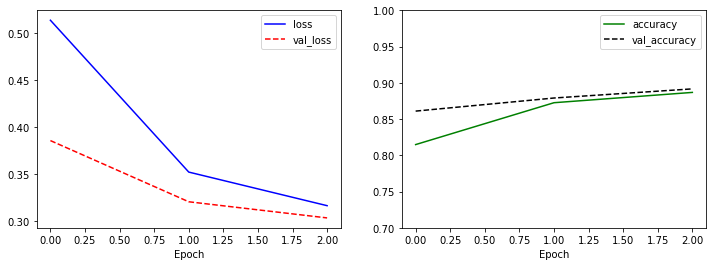

[0.3095510266900063, 0.887]

In [14]:
# 6.11 Fashion MNIST 분류 컨볼루션 신경망 모델 학습 - 풀링 레이어, 드랍아웃 레이어 추가
#history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)
history = model.fit(train_X, train_Y, epochs=3, validation_split=0.25)


import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)

<img src="img/img_23.png">

# 6.4 퍼포먼스 높이기 : 대표적인 방법이    
    - 레이어 더 쌓기 or 보상 구조 추가 등
    - 이미지 보강 : Image Augmentaion

### 6.4.1 ) 레이어 보강하기!!!

<img src="img/img_20.png">

In [16]:
# 6.12 VGGNet 스타일의 Fashion MNIST 분류 컨볼루션 신경망 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 12, 12, 256)       295168    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 256)        

Train on 45000 samples, validate on 15000 samples
Epoch 1/3
45000/45000 [==============================] - 717s 16ms/sample - loss: 0.5888 - accuracy: 0.7854 - val_loss: 0.3424 - val_accuracy: 0.8728
Epoch 2/3
45000/45000 [==============================] - 702s 16ms/sample - loss: 0.3741 - accuracy: 0.8656 - val_loss: 0.2812 - val_accuracy: 0.8935
Epoch 3/3
45000/45000 [==============================] - 705s 16ms/sample - loss: 0.3283 - accuracy: 0.8818 - val_loss: 0.2645 - val_accuracy: 0.9045


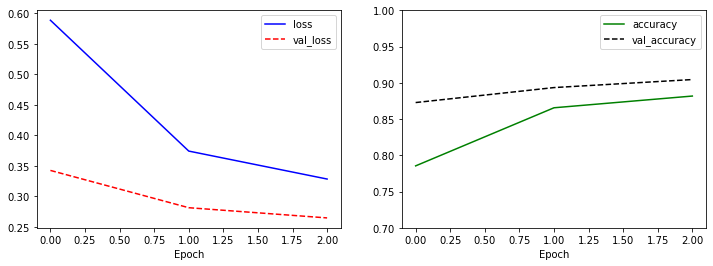

[0.28465447200536725, 0.8986]

In [17]:
# 6.13 VGGNet 스타일의 Fashion MNIST 분류 컨볼루션 신경망 모델 학습
#history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)
history = model.fit(train_X, train_Y, epochs=3, validation_split=0.25)


import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)

### 6.4.2) 이미지 추가( Image Augmentation )   
    - 주된 방식은 뒤집기, 회전, 기울이기,확대 축소, 평행이동 등..

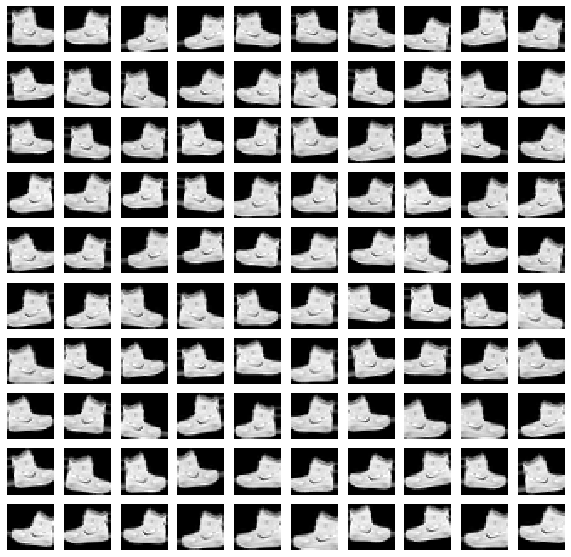

In [18]:
# 6.14 Image Augmentation 데이터 표시
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# 이 ImageDataGenerator 코드 부분은 다음 링크에서 참조했습니다. 
# https://github.com/franneck94/MNIST-Data-Augmentation/blob/master/mnist.py
# rotation, zoom, shift, flip 등을 지정합니다.
image_generator = ImageDataGenerator(
            rotation_range=10,
            zoom_range=0.10,
            shear_range=0.5,
            width_shift_range=0.10,
            height_shift_range=0.10,
            horizontal_flip=True,
            vertical_flip=False)

augment_size = 100

x_augmented = image_generator.flow(np.tile(train_X[0].reshape(28*28),100).reshape(-1,28,28,1), np.zeros(augment_size), batch_size=augment_size, shuffle=False).next()[0]

# 새롭게 생성된 이미지 표시
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for c in range(100):
    plt.subplot(10,10,c+1)
    plt.axis('off')
    plt.imshow(x_augmented[c].reshape(28,28), cmap='gray')
plt.show()

In [19]:
# 6.15 Image Augmentation
image_generator = ImageDataGenerator(
            rotation_range=10,
            zoom_range=0.10,
            shear_range=0.5,
            width_shift_range=0.10,
            height_shift_range=0.10,
            horizontal_flip=True,
            vertical_flip=False)

# 훈련 데이터의 50%인 약 3만장 세팅
augment_size = 30000
# 변형할 3만장의 대상 랜덤 선택
randidx = np.random.randint(train_X.shape[0], size=augment_size)


x_augmented = train_X[randidx].copy()
y_augmented = train_Y[randidx].copy()
x_augmented = image_generator.flow(x_augmented, np.zeros(augment_size),
                                   batch_size=augment_size, shuffle=False).next()[0]

# 원래 데이터인 x_train 에 Image Augmentation 된 x_augmented 를 추가합니다.
# pandas의 concate와 유사함..
train_X = np.concatenate((train_X, x_augmented))
train_Y = np.concatenate((train_Y, y_augmented))

print(train_X.shape)

(90000, 28, 28, 1)


Train on 67500 samples, validate on 22500 samples
Epoch 1/3
67500/67500 [==============================] - 1180s 17ms/sample - loss: 0.5738 - accuracy: 0.7901 - val_loss: 0.5804 - val_accuracy: 0.7788
Epoch 2/3
67500/67500 [==============================] - 1525s 23ms/sample - loss: 0.3757 - accuracy: 0.8650 - val_loss: 0.5011 - val_accuracy: 0.8104
Epoch 3/3
67500/67500 [==============================] - 1170s 17ms/sample - loss: 0.3374 - accuracy: 0.8783 - val_loss: 0.4690 - val_accuracy: 0.8244


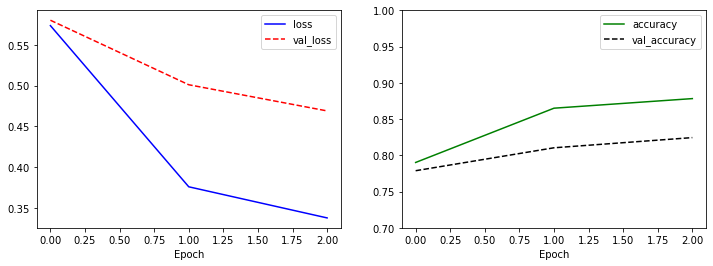

[0.2564222969532013, 0.9064]

In [20]:
# 6.16 VGGNet style 네트워크 + Image Augmentation 학습
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

#history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)
history = model.fit(train_X, train_Y, epochs=2, validation_split=0.25)


import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)

앞의 두 결과에 대한 비교
<img src="img/img_24.png">
<img src="img/img_25.png">